In [2]:
include("systems.jl")
include("iterative_methods.jl")
include("lineal_regressions.jl")
include("factorization.jl")

using Plots
using DataFrames

# 1A 
![Punto 1.A](./images/1a.png)

## 1A.1

In [3]:
A = Float64.([2 -6 -1; -3 -1 7; -8 1 -2])
b = vec(Float64.([-38 -34 -20]))

3-element Vector{Float64}:
 -38.0
 -34.0
 -20.0

***Eliminación gaussiana***:

In [4]:
mat, v, x = direct_matrix_solution(A, b, type = "gaussian_elimination")

println("Reduced matrix: \n", mat)
println("Reduced vector: \n", v)
println("Solution: \n", x)

Reduced matrix: 
[2.0 -6.0 -1.0; 0.0 -10.0 5.5; 0.0 0.0 -18.65]
Reduced vector: 
[-38.0, -91.0, 37.29999999999998]
Solution: 
[4.0; 8.0; -1.9999999999999993;;]


***Eliminación gaussiana con pivoteo parcial:***

In [5]:
mat, v, x = direct_matrix_solution(A, b, type = "partial_pivoting")

println("Reduced matrix: \n", mat)
println("Reduced vector: \n", v)
println("Solution: \n", x)

Reduced matrix: 
[-8.0 1.0 -2.0; 0.0 -1.375 7.75; 0.0 0.0 -33.90909090909091]
Reduced vector: 
[-20.0, -26.5, 67.81818181818181]
Solution: 
[4.0; 8.0; -2.0;;]


***Eliminación gaussiana con pivoteo parcial y escalamiento:*** 

In [6]:
mat, v, x = direct_matrix_solution(A, b, type = "scaled_partial_pivoting")

println("Reduced matrix: \n", mat)
println("Reduced vector: \n", v)
println("Solution: \n", x)

scaling_factors = [6.0; 7.0; 8.0;;]
Reduced matrix: 
[-8.0 1.0 -2.0; 0.0 -1.375 7.75; 0.0 0.0 -33.90909090909091]
Reduced vector: 
[-20.0, -26.5, 67.81818181818181]
Solution: 
[4.0; 8.0; -2.0;;]


## 1A.2

In [7]:
A = Float64.([0 -3 7; 1 2 -1; 5 -2 0])
b = vec(Float64.([2 3 2]))

3-element Vector{Float64}:
 2.0
 3.0
 2.0

***Eliminación gaussiana***:

In [8]:
mat, v, x = direct_matrix_solution(A, b, type = "gaussian_elimination")

println("Reduced matrix: \n", mat)
println("Reduced vector: \n", v)
println("Solution: \n", x)

Reduced matrix: 
[0.0 -3.0 7.0; NaN Inf -Inf; NaN NaN NaN]
Reduced vector: 
[2.0, -Inf, NaN]
Solution: 
[NaN; NaN; NaN;;]


***Eliminación gaussiana con pivoteo parcial:***

In [9]:
mat, v, x = direct_matrix_solution(A, b, type = "partial_pivoting")

println("Reduced matrix: \n", mat)
println("Reduced vector: \n", v)
println("Solution: \n", x)

Reduced matrix: 
[5.0 -2.0 0.0; 0.0 2.4 -1.0; 0.0 0.0 5.75]
Reduced vector: 
[2.0, 2.6, 5.25]
Solution: 
[0.9855072463768118; 1.463768115942029; 0.9130434782608695;;]


***Eliminación gaussiana con pivoteo parcial y escalamiento:***

In [10]:
mat, v, x = direct_matrix_solution(A, b, type = "scaled_partial_pivoting")

println("Reduced matrix: \n", mat)
println("Reduced vector: \n", v)
println("Solution: \n", x)

scaling_factors = [7.0; 2.0; 5.0;;]
Reduced matrix: 
[0.0 2.4 -1.0; 5.0 -2.0 0.0; -7.5 0.0 7.0]
Reduced vector: 
[2.6, 2.0, -1.0]
Solution: 
[Inf; -1.0; -0.14285714285714285;;]


### Conclusiones:

Conclusiones del punto 1A (1A.1 y 1A.2)

# 1B
![Punto 1.B](images/1b.png)

In [11]:
A = Float64.([3 -0.1 -0.2; 0.1 7 -0.3; 0.3 -0.2 10])
b = vec(Float64.([7.85 -19.3 71.4]))

3-element Vector{Float64}:
   7.85
 -19.3
  71.4

In [12]:
include("factorization.jl")

Inverse (generic function with 1 method)

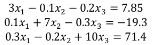

In [13]:
L, U = LU(A)
println("A: \n", L*U)
println("L: \n", L)
println("U: \n", U)

A: 
[3.0 -0.1 -0.2; 0.1 6.996666666666667 -0.30666666666666664; 0.3 -0.21000000000000002 9.98857142857143]
L: 
[1.0 0.0 0.0; 0.03333333333333333 1.0 0.0; 0.09999999999999999 -0.028571428571428574 1.0]
U: 
[3.0 -0.1 -0.2; 0.0 7.0 -0.3; 0.0 0.0 10.0]


In [14]:
M = Inverse(A)

3×3 Matrix{Float64}:
  0.333333   0.0         0.0
 -0.0047619  0.142857    0.0
 -0.0100952  0.00285714  0.1

In [15]:
# solution
L,U = LU(A)
y = solution(L,b)
x = solution(U,y)
println("Solution: \n", x)

Solution: 
[2.6166666666666667, -2.7945238095238096, 7.005609523809525]


# 2A

![Punto 2A](./images/2a.png)

In [16]:
A = [15 -3 -1; -3 18 -6; -4 -1 12]
b = vec([3800 1200 2350])
x = vec([0 0 0])
tol = 0.001

ans1 = jacobi(A, b, x, tol, norm="norm_infinite")

3-element Vector{Float64}:
 320.2069362156423
 227.20159610735647
 321.5022071791104

In [17]:
A = [15 -3 -1; -3 18 -6; -4 -1 12]
b = vec([3800 1200 2350])
x = vec([0 0 0])
tol = 0.01

ans2 = gauss_siedel(A, b, x, tol, norm="norm_infinite")

3-element Vector{Float64}:
 320.20600323827216
 227.20102316756703
 321.502086343388

# 2B
![Punto 2B](./images/2b.png)

#### 2B.1

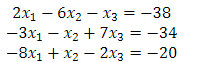

In [18]:
A = [2 -6 -1; -3 -1 7; -8 1 -2]
b = vec([-38 -34 -20])
x = vec([0 0 0])
tol = 0.001

0.001

In [19]:
ans3 = jacobi(A, b, x, tol, norm="norm_infinite")

3-element Vector{Float64}:
  1323.25
 -3343.0
 -1806.5

In [20]:
ans4 = gauss_siedel(A, b, x, tol, norm="norm_infinite")

3-element Vector{Float64}:
   319.75
    -4.75
 -1271.375

#### 2B.2

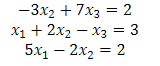

In [21]:
A = [0.0001 -3 7; 1 2 -1; 5 -2 0.0001]
b = vec([2 3 2])
x = vec([0 0 0])
tol = 0.001

0.001

In [22]:
ans5 = jacobi(A, b, x, tol, norm="norm_infinite")

3-element Vector{Float64}:
 -1.399935e9
  1.5
 -9.9995e8

In [23]:
ans6 = gauss_siedel(A, b, x, tol, norm="norm_infinite")

3-element Vector{Float64}:
 20000.0
 -9998.5
    -1.19995e9

#### 2B.3

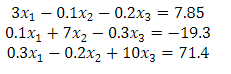

In [24]:
A = [3 -0.1 -0.2; 0.1 7 -0.3; 0.3 -0.2 10]
b = vec([7.85 -19.3 71.4])
x = vec([0 0 0])
tol = 0.001

0.001

In [25]:
jacobi(A, b, x, tol, norm="norm_infinite")

3-element Vector{Float64}:
  3.000806349206349
 -2.49973843537415
  7.000206666666667

In [26]:
gauss_siedel(A, b, x, tol, norm="norm_infinite")

3-element Vector{Float64}:
  3.0000003524692724
 -2.5000000357546064
  6.99999998871083

# 2C
![Punto 2C](./images/2c.png)

# 3A

![3a](./images/3a.png)

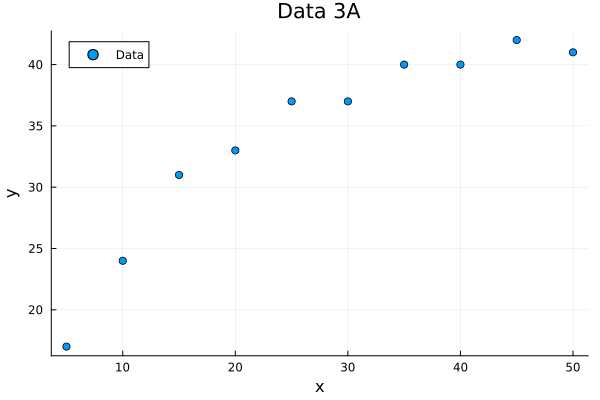

In [27]:
start = 5
end_ = 50
x = vec(range(start = start, stop = end_, step = 5))
y = vec([17 24 31 33 37 37 40 40 42 41])
points = [(x[i], y[i]) for i in 1:length(x)]

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3A")

## 3A.1

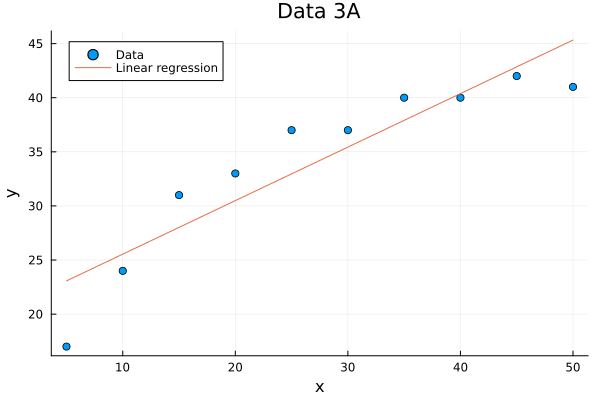

In [28]:
a0, a1 = linear_regression(points)
lin_fn = build_lin_fn(a0, a1)

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3A")
plot!(lin_fn, start, end_, label = "Linear regression")

## 3A.2

## 3A.3

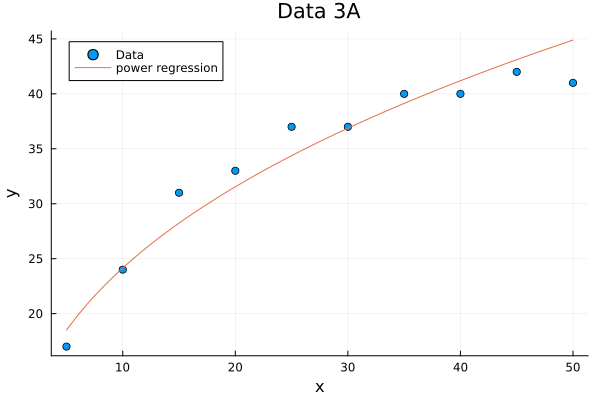

In [29]:
a0, a1 = power_regression(points)
pow_fn = build_pow_fn(a0, a1)

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3A")
plot!(pow_fn, start, end_, label = "power regression")

## 3A.4

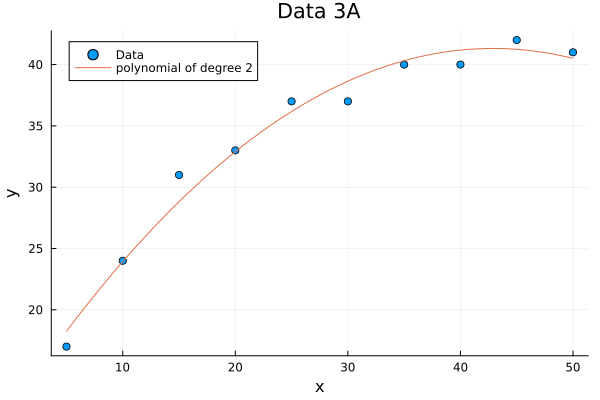

In [30]:
degree = 3
a = polynomial_regression(points, degree)
quad_fn = build_poly_fn(a)

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3A")
plot!(quad_fn, start, end_, label = "polynomial of degree $(degree-1)")


## 3A.5

In [31]:
generated_points = [y, lin_fn.(x), pow_fn.(x), quad_fn.(x)]

df = DataFrame(generated_points, [:x, :linear, :power, :polynomial])
df

Row,x,linear,power,polynomial
,Float64,Float64,Float64,Float64
1,17.0,23.0727,18.4973,18.2545
2,24.0,25.5455,24.1561,23.9394
3,31.0,28.0182,28.2381,28.8212
4,33.0,30.4909,31.5462,32.9
5,37.0,32.9636,34.3768,36.1758
6,37.0,35.4364,36.877,38.6485
7,40.0,37.9091,39.1323,40.3182
8,40.0,40.3818,41.1971,41.1848
9,42.0,42.8545,43.1087,41.2485


## 3A.6

Para saber cuál es mejor usaremos el standard estimation error generado por cada método

In [32]:
funcs = [lin_fn, pow_fn, quad_fn]
standard_errors = [standard_stimation_error(points, func) for func in funcs]

df = DataFrame(linear     = [standard_errors[1]],
               power      = [standard_errors[2]],
               polynomial = [standard_errors[3]]) 

Row,linear,power,polynomial
,Float64,Float64,Float64
1,3.48503,2.16448,1.22691


# 3B

![3b](./images/3b.png)

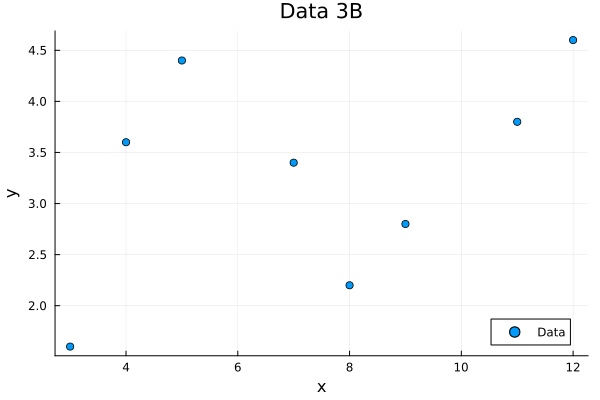

In [33]:
x = vec([3 4 5 7 8 9 11 12])
y = vec([1.6 3.6 4.4 3.4 2.2 2.8 3.8 4.6])
points = [(x[i], y[i]) for i in 1:length(x)]

start = x[1]
end_ = x[end]

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3B")

## 3B.1

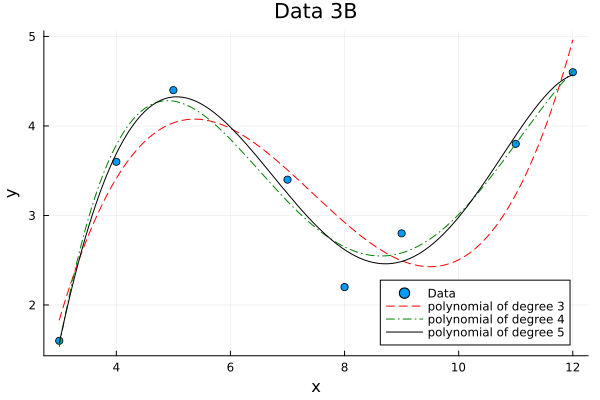

In [34]:
degree = 4

fn_degree3 = build_poly_fn(polynomial_regression(points, degree))
fn_degree4 = build_poly_fn(polynomial_regression(points, degree + 1))
fn_degree5 = build_poly_fn(polynomial_regression(points, degree + 2))

scatter(x, y, label = "Data", xlabel = "x", ylabel = "y", title = "Data 3B")
plot!(fn_degree3, start, end_, label = "polynomial of degree $(degree-1)",  color = :red,   linestyle = :dash,)
plot!(fn_degree4, start, end_, label = "polynomial of degree $(degree)",    color = :green, linestyle = :dashdot,)
plot!(fn_degree5, start, end_, label = "polynomial of degree $(degree+1)",  color = :black)

## 3B.2

## 3B.3

## 3B.4

## 3.C

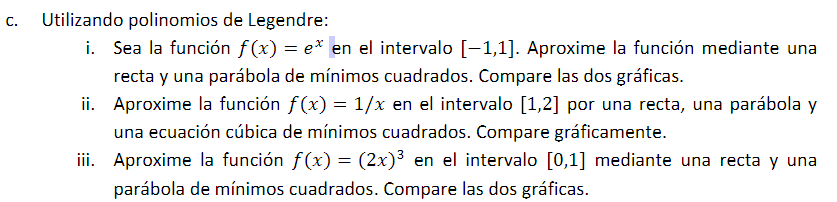

In [71]:
function f1(t)
    return 1/(((b-a)*(t + 1)/2) + a)
end

function f2(x)
    return 1/x
end

# x = ((b - a)*(t + 1)/2) + a
# t = -1 + (2*(x - a)/(b - a))
function change_of_variable(x, a::Float64, b::Float64)::Float64
    return -1 + (2*(x - a)/(b - a))
end

function change_of_variable_inv(t, a::Float64, b::Float64)::Float64
    return a + ((b - a)*(t + 1)/2)
end

change_of_variable_inv (generic function with 1 method)

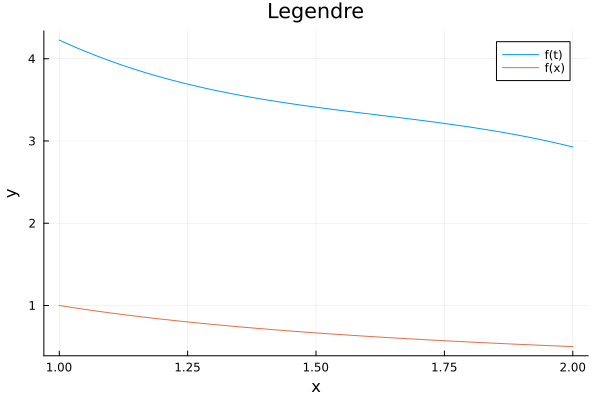

In [86]:
include("legrende.jl")
@variables x
a = 1.0
b = 2.0

a_ = change_of_variable(a, a, b)
b_ = change_of_variable(b, a, b)

f = legendre(f1, a_, b_ , 3)

# plot the function
x = range(start = a, stop = b, length = 100)
t = change_of_variable.(x, a, b)
yprima = f.(t)

plot(x, yprima,  label = "f(t)", xlabel = "x", ylabel = "y", title = "Legendre")
plot!(x, f2.(x), label = "f(x)", xlabel = "x", ylabel = "y", title = "Legendre")

In [81]:
t

100-element Vector{Float64}:
 -1.0
 -0.9797979797979797
 -0.9595959595959598
 -0.9393939393939394
 -0.9191919191919191
 -0.8989898989898988
 -0.8787878787878789
 -0.8585858585858586
 -0.8383838383838382
 -0.8181818181818183
 -0.797979797979798
 -0.7777777777777777
 -0.7575757575757578
  ⋮
  0.7777777777777777
  0.797979797979798
  0.8181818181818183
  0.8383838383838382
  0.8585858585858586
  0.8787878787878789
  0.8989898989898988
  0.9191919191919191
  0.9393939393939394
  0.9595959595959598
  0.9797979797979797
  1.0

In [84]:
f1.(t)

100-element Vector{Float64}:
 1.0
 0.99
 0.9801980198019803
 0.9705882352941176
 0.9611650485436893
 0.9519230769230769
 0.942857142857143
 0.9339622641509434
 0.925233644859813
 0.9166666666666667
 0.908256880733945
 0.8999999999999999
 0.891891891891892
 ⋮
 0.5294117647058824
 0.526595744680851
 0.5238095238095238
 0.5210526315789474
 0.518324607329843
 0.515625
 0.5129533678756477
 0.5103092783505154
 0.5076923076923077
 0.5051020408163265
 0.5025380710659899
 0.5

In [82]:
change_of_variable_inv.(t, a, b)

100-element Vector{Float64}:
 1.0
 1.0101010101010102
 1.02020202020202
 1.0303030303030303
 1.0404040404040404
 1.0505050505050506
 1.0606060606060606
 1.0707070707070707
 1.0808080808080809
 1.0909090909090908
 1.101010101010101
 1.1111111111111112
 1.121212121212121
 ⋮
 1.8888888888888888
 1.898989898989899
 1.9090909090909092
 1.9191919191919191
 1.9292929292929293
 1.9393939393939394
 1.9494949494949494
 1.9595959595959596
 1.9696969696969697
 1.97979797979798
 1.9898989898989898
 2.0